# Hopsital Stay Prediction of COVID-19 Patients

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset 

In [4]:
# Since the dataset is stored in a CSV file. Use pandas to read the data from file. 

df = pd.read_csv('/content/drive/MyDrive/Msc Project/Predicting the Length of stay of patients for healthcare facility management./host_train.csv')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# View the contents of dataset
df.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
df.info() # It gives the data type information of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

<b> The dataset has total 18 columns. First 17 columns have feature values and last one is target variable. Here some columns are numerical ( whose Dtype is 'int' or 'float' ). And some are categorical ( Dtype is 'object' ). 

In [8]:
df.describe()  # It tells data statictics.

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Patient_Visitors,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,1.256841,4.771717,0.778098,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,1.535712,3.102535,0.752527,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,1.000000,5.000000,1.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,2.000000,7.000000,1.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


<b> Here mean value of some columns is very large ( Like admission deposit ) while others have very low ( Like patient visitors ). This info indicates that features values have different scales. So we would need to standarize them to have equal mean and variance. It ensures that features with large values aren’t employed as the primary predictors.

## Exploratory Data Analysis 

<b> This section is devoted to analyse the dataset that will help to decide the preprocessing needed for dataset.

### Univariate Analysis

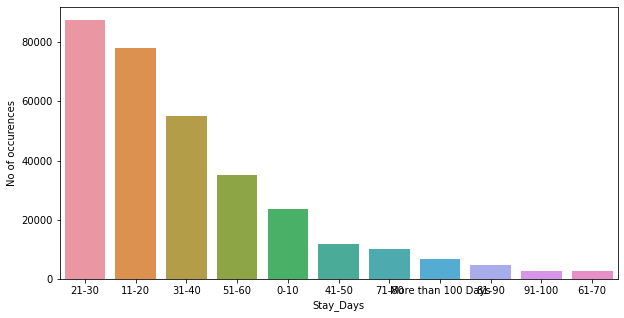

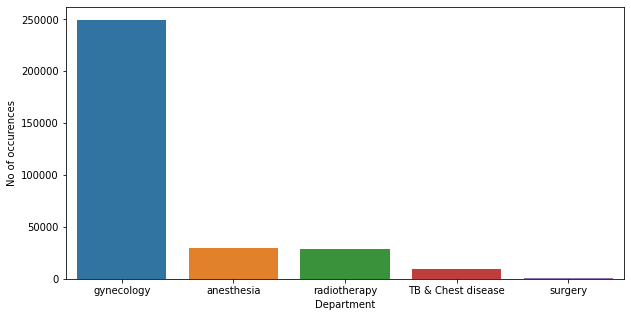

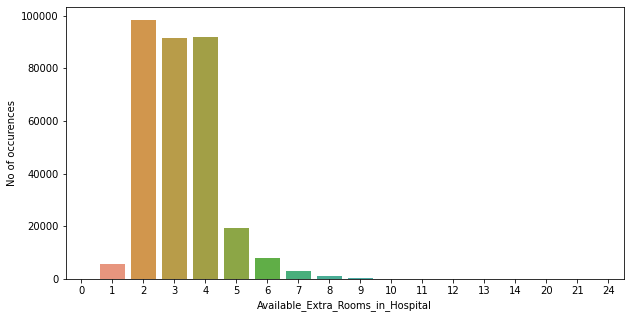

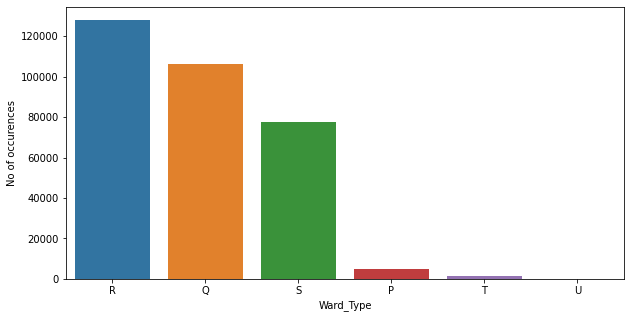

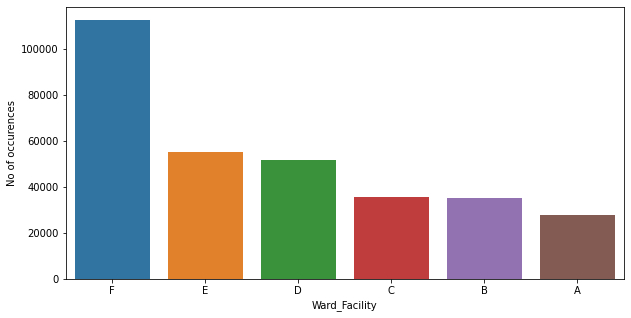

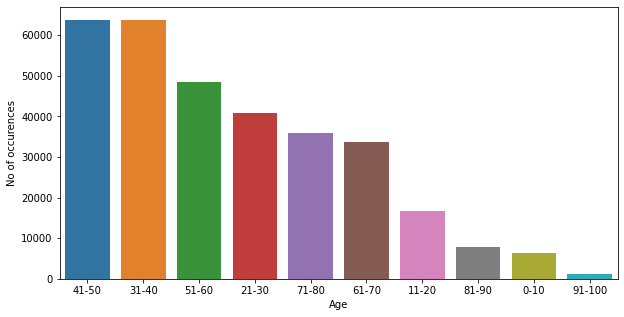

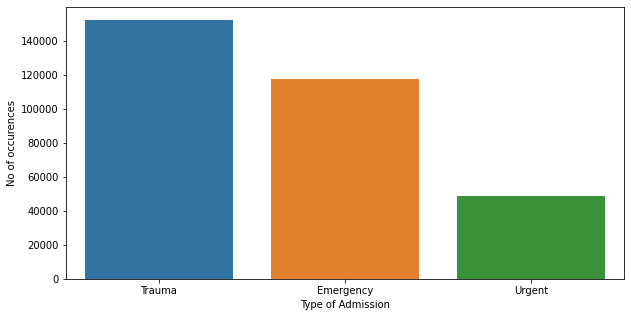

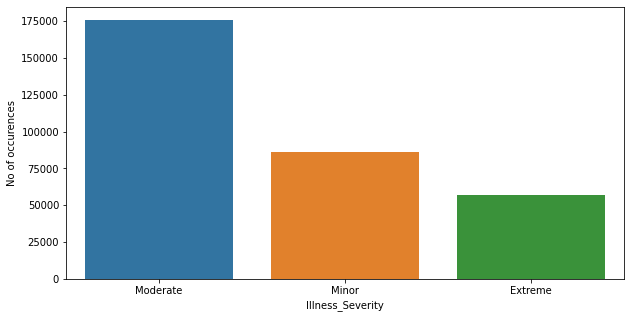

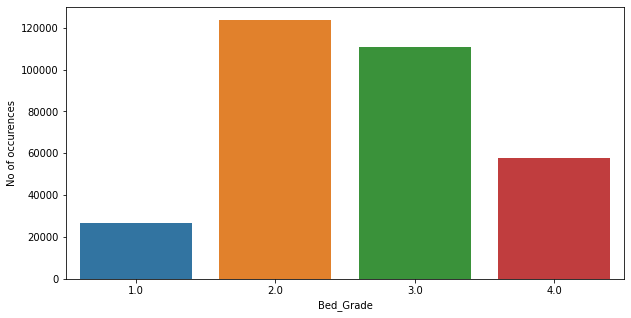

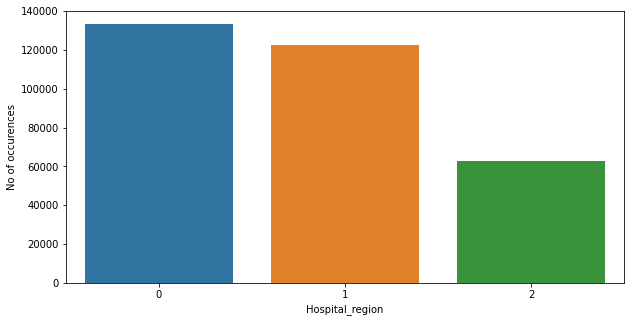

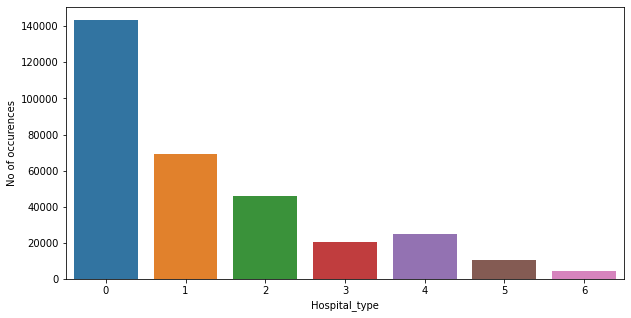

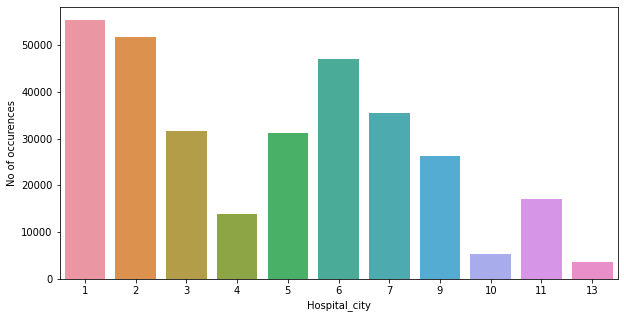

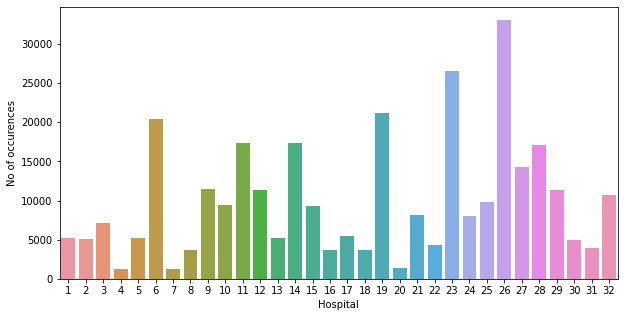

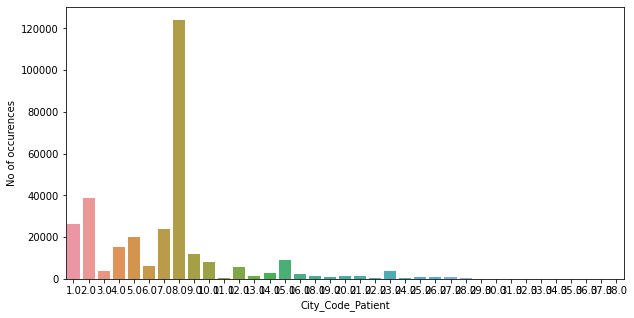

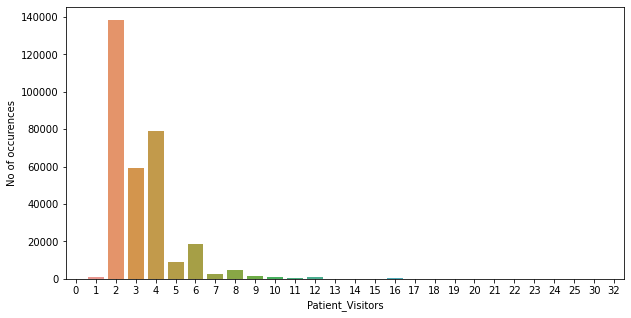

In [9]:
for i in [ 'Stay_Days', 'Department', 'Available_Extra_Rooms_in_Hospital', 'Ward_Type' ,'Ward_Facility', 'Age', 
          'Type of Admission', 'Illness_Severity', 'Bed_Grade', 'Hospital_region', 'Hospital_type' ,  
          'Hospital_city', 'Hospital', 'City_Code_Patient', 'Patient_Visitors']:
            count = df[i].value_counts()

            plt.figure(figsize=(10,5))

            sns.barplot(x=count.index.values, y=count.values,data=df)
            
            plt.xlabel(i)
            plt.ylabel('No of occurences')

### Bivariate Analysis

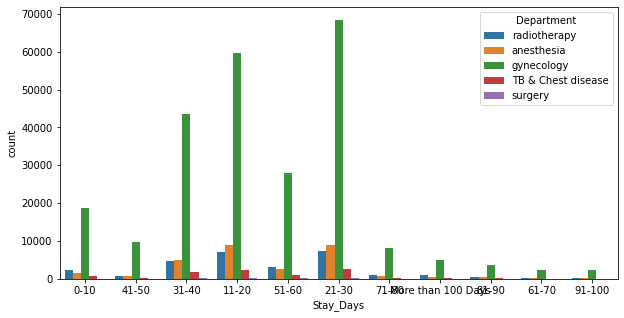

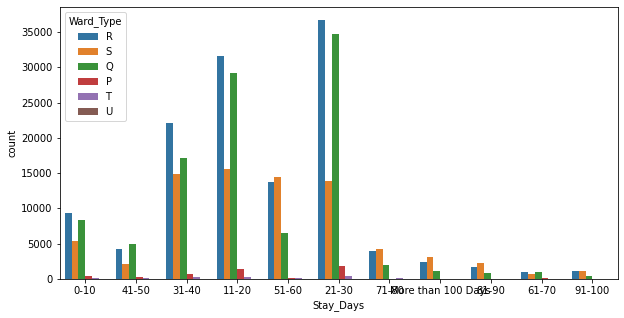

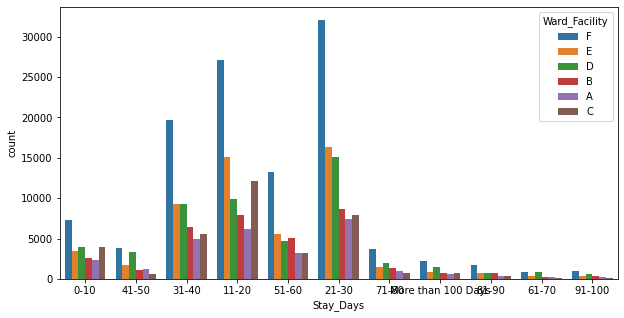

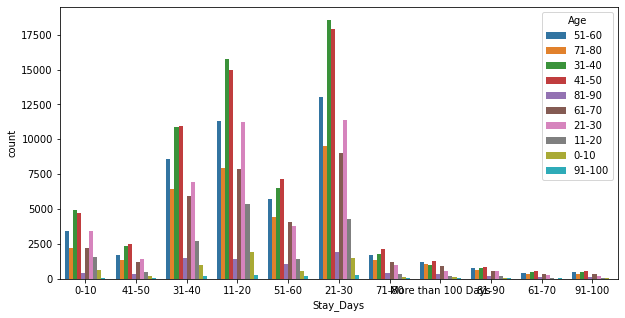

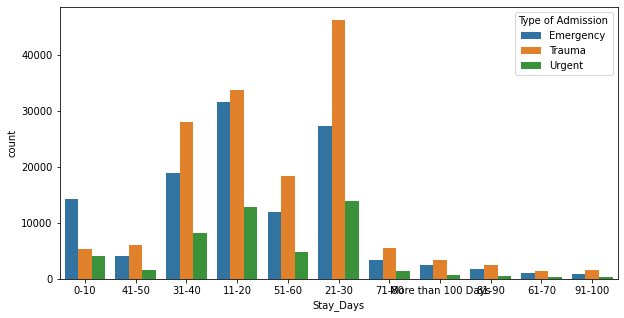

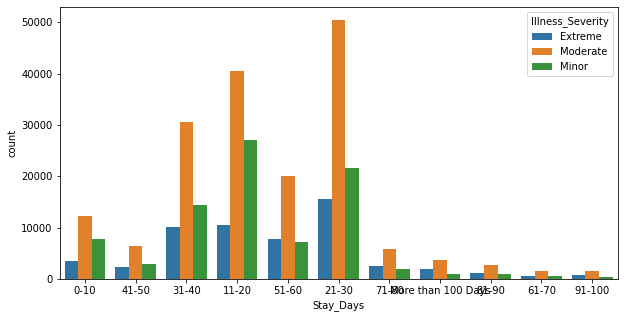

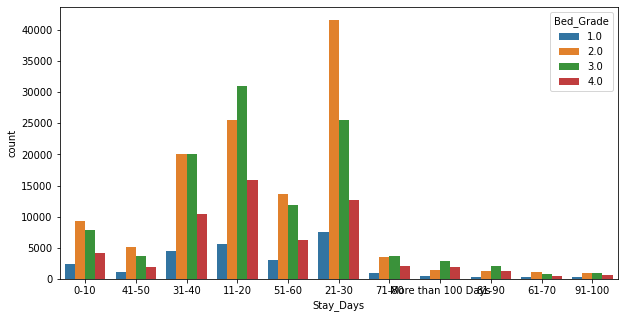

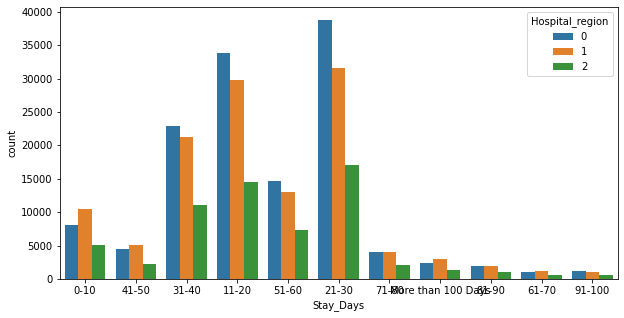

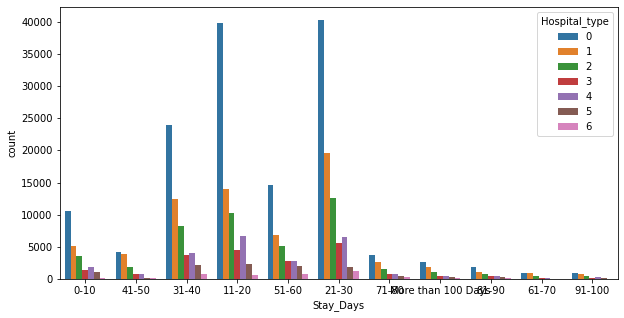

In [10]:
for i in [ 'Department', 'Ward_Type' ,'Ward_Facility', 'Age', 'Type of Admission', 'Illness_Severity', 
          'Bed_Grade', 'Hospital_region', 'Hospital_type' ]:

            plt.figure(figsize=(10,5))

            sns.countplot(x='Stay_Days',hue=i,data=df)

### Distribution of Stay Days 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


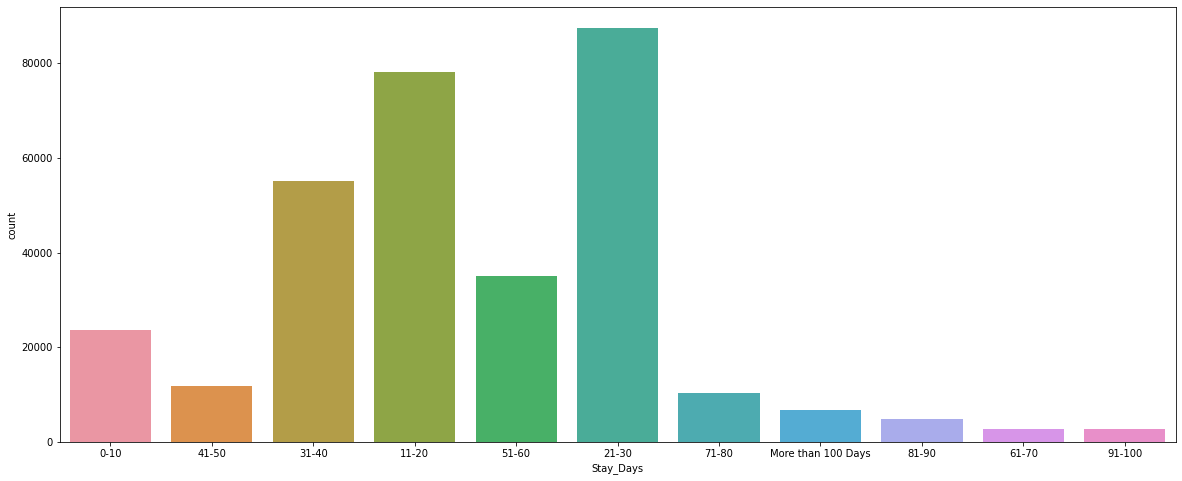

In [11]:
plt.figure(figsize=(20, 8))
sns.countplot(df['Stay_Days'])

<b> The above graph shows that mostly patients stay in the hospital for 21 to 30 days.

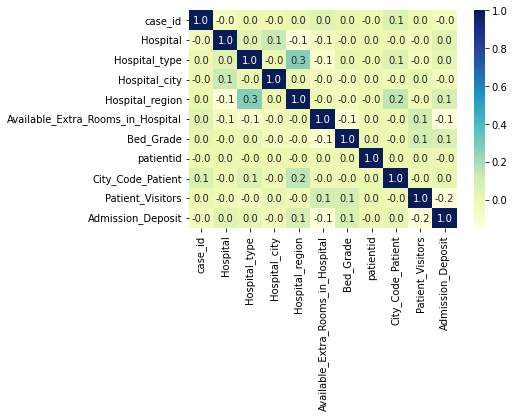

In [12]:
# Plot the correlation between data columns
correlations = df.corr()
sns.heatmap(correlations, annot=True, fmt=".1f", cmap="YlGnBu")

<b> Because some colums of this dataset are categorical. The above graph shows the correlation of only numerical variables. Next data preprocessing will help to solve this problem and we will be able to get the correlation between target variable and all features.

# Outlier Analysis

Checking for outliers

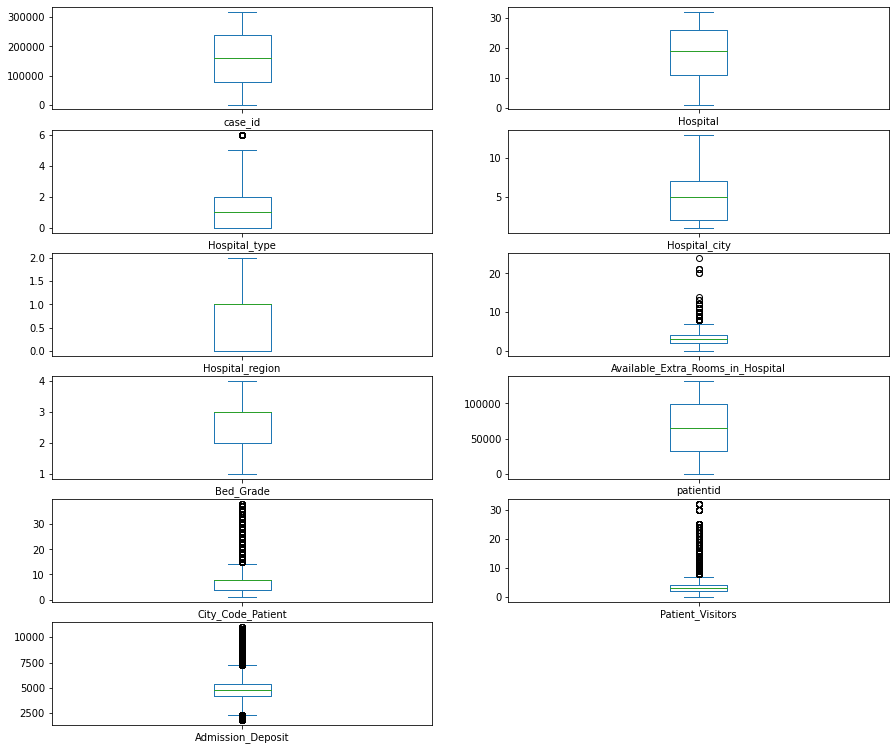

In [13]:
df.plot(kind="box",subplots=True,layout=(9,2),figsize=(15,20));

In [14]:
columns=[  'Available_Extra_Rooms_in_Hospital', 
           'Hospital_type', 'City_Code_Patient', 'Patient_Visitors','Admission_Deposit']

In [15]:
for column in columns:
    df[f'{column}_zscore'] = (df[column] - df[column].mean())/df[column].std()
# Set the threshold for identifying outliers
threshold = 1.5
# Remove the rows containing outliers
for column in columns:
    df = df[(df[f'{column}_zscore'] < threshold) & (df[f'{column}_zscore'] > -threshold)]
extra_colums=['Available_Extra_Rooms_in_Hospital_zscore', 'Hospital_type_zscore', 'City_Code_Patient_zscore','Patient_Visitors_zscore','Admission_Deposit_zscore']
for col in extra_colums:
  df=df.drop(col,axis=1)
df = df[df.Hospital_type != 3]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166807 entries, 0 to 318436
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            166807 non-null  int64  
 1   Hospital                           166807 non-null  int64  
 2   Hospital_type                      166807 non-null  int64  
 3   Hospital_city                      166807 non-null  int64  
 4   Hospital_region                    166807 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  166807 non-null  int64  
 6   Department                         166807 non-null  object 
 7   Ward_Type                          166807 non-null  object 
 8   Ward_Facility                      166807 non-null  object 
 9   Bed_Grade                          166725 non-null  float64
 10  patientid                          166807 non-null  int64  
 11  City_Code_Patient                  1668

after removing outliers

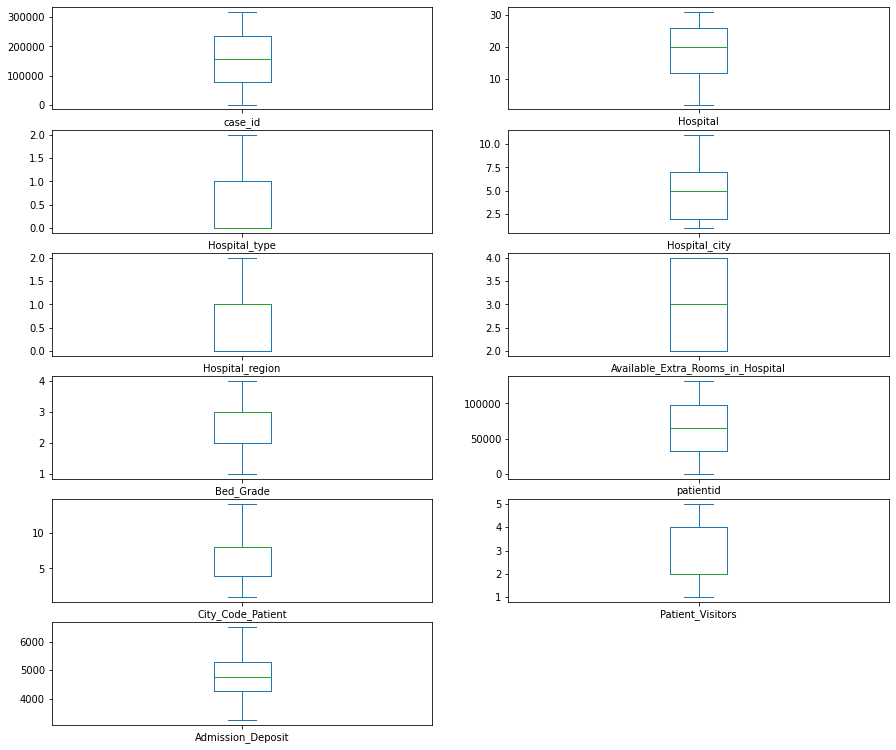

In [17]:
df.plot(kind="box",subplots=True,layout=(9,2),figsize=(15,20));

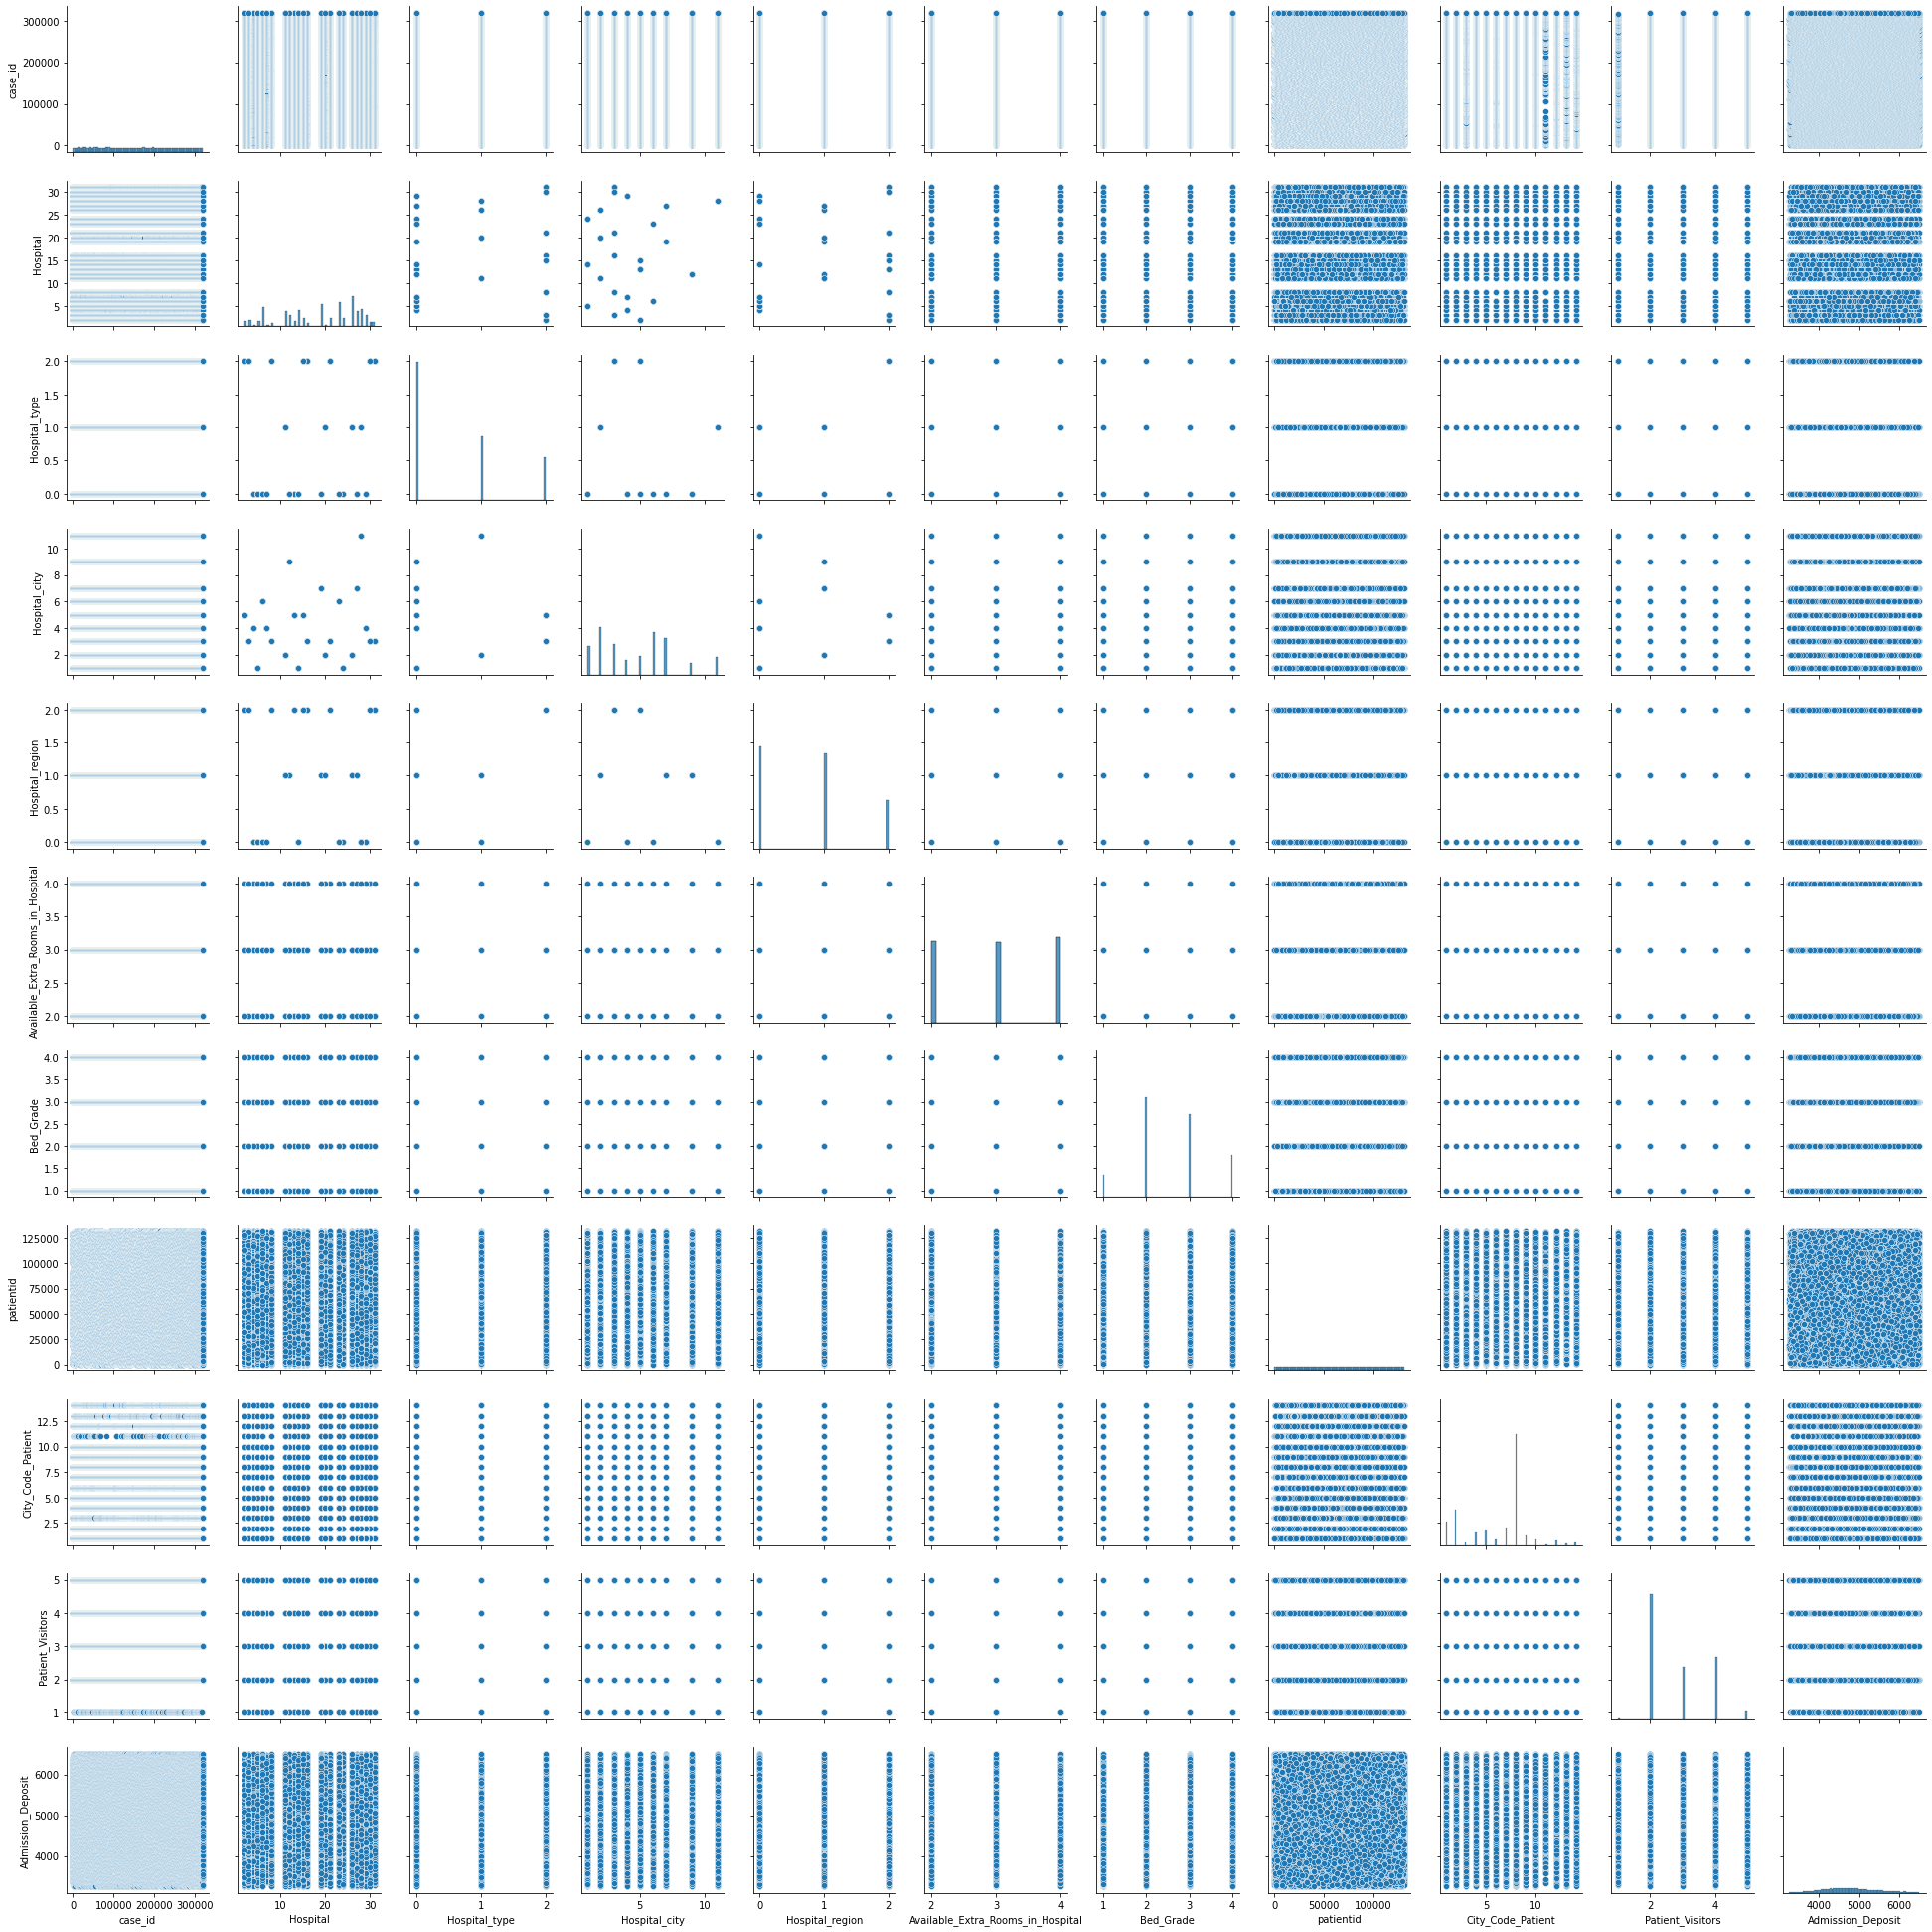

In [18]:
import seaborn
seaborn.pairplot(df)

## Data Preprocessing

Data preprocessing is an important step of machine learning pipeline. If not performed well, it may result in performance degradation of models. Let's discover the inconsistencies of data and process them. 

### Check missing values  

In [19]:
df.isna().sum() # It will show the missing values in each colums.

case_id                               0
Hospital                              0
Hospital_type                         0
Hospital_city                         0
Hospital_region                       0
Available_Extra_Rooms_in_Hospital     0
Department                            0
Ward_Type                             0
Ward_Facility                         0
Bed_Grade                            82
patientid                             0
City_Code_Patient                     0
Type of Admission                     0
Illness_Severity                      0
Patient_Visitors                      0
Age                                   0
Admission_Deposit                     0
Stay_Days                             0
dtype: int64

<b> So only 'Bed_Grade' and 'City_Code_Patient' have few values missing. Lets check their percentage with respect to size of dataset. If percentage is less than 2%, the practice is to drop the rows with missing values.

In [20]:
df.isnull().sum() * 100 / len(df) # Percenatge of missing values

case_id                              0.000000
Hospital                             0.000000
Hospital_type                        0.000000
Hospital_city                        0.000000
Hospital_region                      0.000000
Available_Extra_Rooms_in_Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility                        0.000000
Bed_Grade                            0.049159
patientid                            0.000000
City_Code_Patient                    0.000000
Type of Admission                    0.000000
Illness_Severity                     0.000000
Patient_Visitors                     0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay_Days                            0.000000
dtype: float64

In [21]:
# Since percentage of missing values is less than 2%. Lets simply drop them.
df = df.dropna()

###  Encoding

Categorical features of a dataset cause certain problems. Recall the one we faced during the data correlation plot. And mostly ML models accpets only the numerical data. They reject the categorical data. So there is a need to convert the categorical features to numerical ones. This process is called encoding where each category of the data is mapped to a unique number. 

In [22]:
# Get categorical features of the data
cat_features = [i for i in df.columns if df[i].dtypes=='object'] 
print(cat_features)

['Department', 'Ward_Type', 'Ward_Facility', 'Type of Admission', 'Illness_Severity', 'Age', 'Stay_Days']


In [23]:
# Analyse the categories in details 
da = pd.DataFrame(columns=['Feature','Unique feature Values','Number of categories'])
c = []
u = []
n = []
for i in cat_features:
    c.append(i)
    u.append(df[i].unique())
    n.append(df[i].unique().size)
    
da['Feature'] = c
da['Unique feature Values'] = u
da['Number of categories'] = n

# Print the results of analysis
da

,Feature,Unique feature Values,Number of categories
0,Department,"[radiotherapy, anesthesia, gynecology, TB & Ch...",5
1,Ward_Type,"[R, S, Q, P, T, U]",6
2,Ward_Facility,"[F, D, A, B, C, E]",6
3,Type of Admission,"[Emergency, Trauma, Urgent]",3
4,Illness_Severity,"[Extreme, Moderate, Minor]",3
5,Age,"[51-60, 71-80, 31-40, 41-50, 81-90, 61-70, 21-...",10
6,Stay_Days,"[0-10, 41-50, 11-20, 31-40, 21-30, 51-60, 71-8...",11


We apply Label Encoding when the categorical feature is ordinal e.g. here 'Type of Admission', 'Illness_Severity', 'Age' and 'Stay_Days' are ordinal. 
While for non-ordinal features, one-hot encoding is used. Here, we will apply it to 'Department', 'Ward_Type' and 'Ward_Facility'. 

In [24]:
# Use sklearn package 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 

le = LabelEncoder()
he = OneHotEncoder()

ordinal_feat = ['Type of Admission', 'Illness_Severity', 'Age', 'Stay_Days']
nord_feat = ['Department', 'Ward_Type', 'Ward_Facility']


# Apply label encoding to ordinal features
for j in ordinal_feat:
    df[j]  = le.fit_transform(df[j].astype(str))
    mapp = dict(zip(le.classes_, le.transform(le.classes_)))
    print("\n Encoding for",j,'\n')
    print(mapp)
    
    
# Apply one hot encoding to non-ordinal features
df = pd.get_dummies(df, columns=nord_feat)


 Encoding for Type of Admission 

{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}

 Encoding for Illness_Severity 

{'Extreme': 0, 'Minor': 1, 'Moderate': 2}

 Encoding for Age 

{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

 Encoding for Stay_Days 

{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


<ipython-input-24-fd8bd4cedee9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j]  = le.fit_transform(df[j].astype(str))


Dataset after encoding


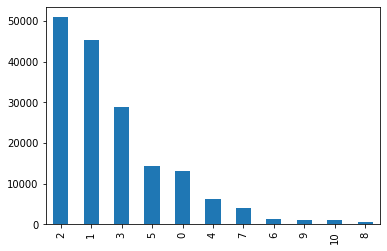

In [25]:
print('Dataset after encoding')
df['Stay_Days'].value_counts().plot(kind='bar')

### Scaling 

As we descibed ealier the need for standarization or scaling the features ( so there is no bias to features with large values). Lets do it to have zero mean and unit standard deviation of all features which is called standard scaling.

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cols = df.columns[df.columns != 'Stay_Days'] # Transformer will apply to all columns except target variable 'Stay_Days'
df[cols] = sc.fit_transform(df[cols])

<b> Since our dataset is now processed. Lets get the correlation matrix plot again.

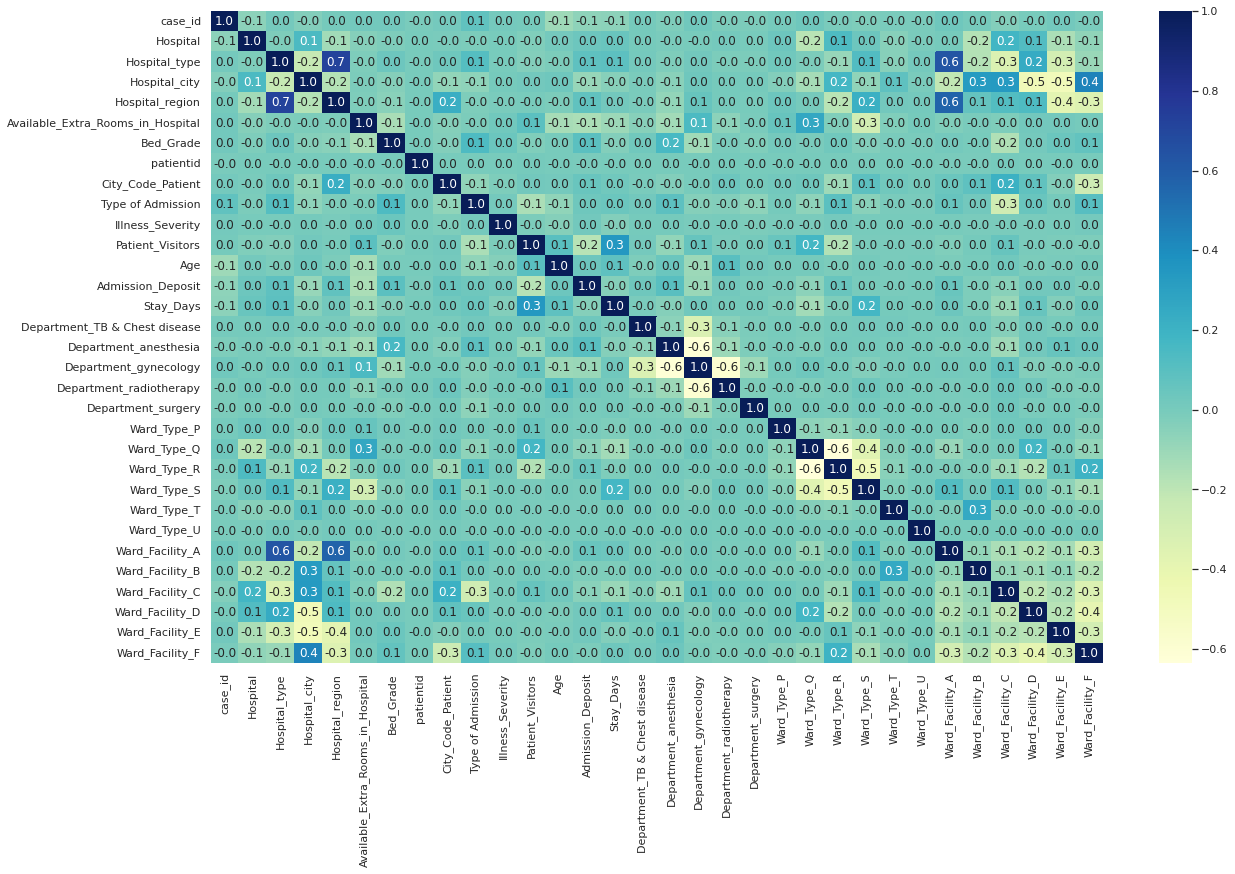

In [27]:
# Plot the correlation between data columns
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(df.corr(), annot = True, fmt='.1f',cmap="YlGnBu")

## Feature Selection 

We will use nivariate feature selection method that works by selecting the best features based on univariate statistical tests. For example, the default score function is "f_classif" that computes the ANOVA F-value for the provided sample.

In [28]:
from sklearn.feature_selection import SelectKBest
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [29]:
X = df.drop(['Stay_Days'], axis=1)
y = df['Stay_Days']

**Synthetic Minority Oversampling TEchnique (SMOTE)**


> SMOTE is a machine learning technique that solves problems that occur when using an imbalanced data set. In our dataset the records of each category are not balanced, 2-3 classes contains around 50,000+ records and other contains few. This can be handle by utilizing SMOTE.   



In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

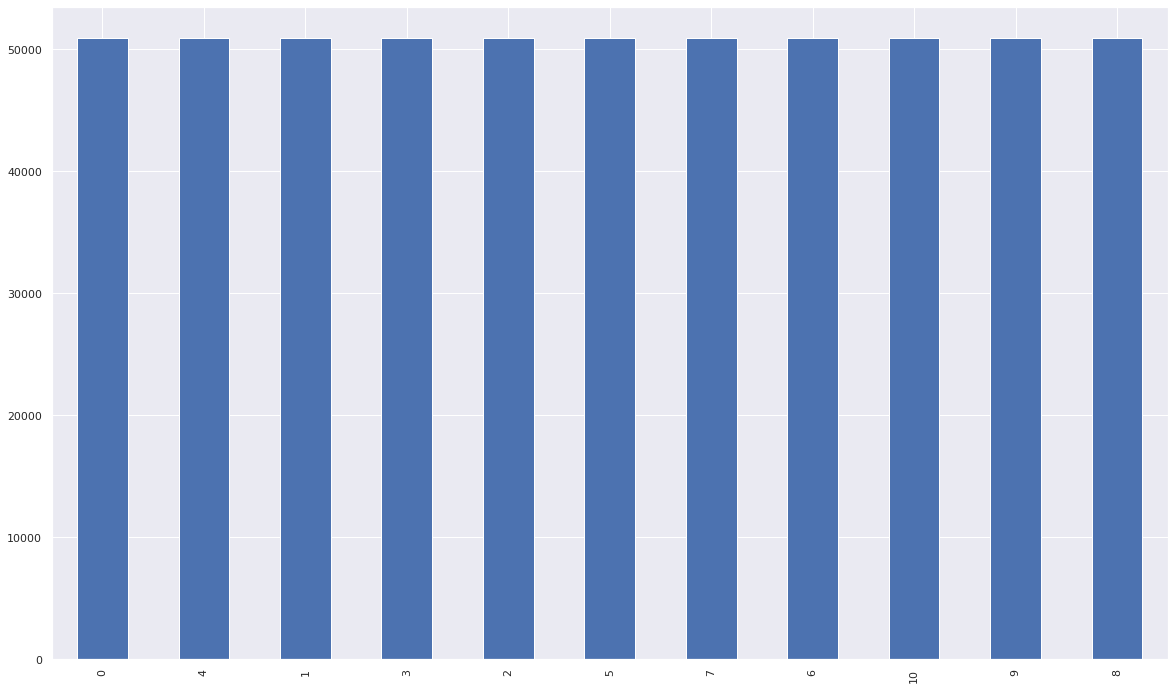

In [31]:
y.value_counts().plot(kind='bar')

In [32]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15, step=15)
# Fit the model
fit = rfe.fit(X, y)

In [33]:
# Summarize all features
names = X.columns
for i in range(X.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (names[i], rfe.support_[i], rfe.ranking_[i]))

Column: case_id, Selected True, Rank: 1.000
Column: Hospital, Selected True, Rank: 1.000
Column: Hospital_type, Selected True, Rank: 1.000
Column: Hospital_city, Selected True, Rank: 1.000
Column: Hospital_region, Selected False, Rank: 3.000
Column: Available_Extra_Rooms_in_Hospital, Selected True, Rank: 1.000
Column: Bed_Grade, Selected True, Rank: 1.000
Column: patientid, Selected True, Rank: 1.000
Column: City_Code_Patient, Selected True, Rank: 1.000
Column: Type of Admission, Selected True, Rank: 1.000
Column: Illness_Severity, Selected True, Rank: 1.000
Column: Patient_Visitors, Selected True, Rank: 1.000
Column: Age, Selected True, Rank: 1.000
Column: Admission_Deposit, Selected True, Rank: 1.000
Column: Department_TB & Chest disease, Selected False, Rank: 3.000
Column: Department_anesthesia, Selected False, Rank: 3.000
Column: Department_gynecology, Selected False, Rank: 2.000
Column: Department_radiotherapy, Selected False, Rank: 3.000
Column: Department_surgery, Selected False

In [34]:
# Name of Selected features
sf = rfe.get_feature_names_out()
print(sf)

['case_id' 'Hospital' 'Hospital_type' 'Hospital_city'
 'Available_Extra_Rooms_in_Hospital' 'Bed_Grade' 'patientid'
 'City_Code_Patient' 'Type of Admission' 'Illness_Severity'
 'Patient_Visitors' 'Age' 'Admission_Deposit' 'Ward_Type_Q' 'Ward_Type_S']


In [35]:
# Transform the data so that X is reduced to the selected features.
X = rfe.transform(X) # New 'X' with selected features
X = pd.DataFrame(X,columns=sf)
X.head() # Display New feature set

,case_id,Hospital,Hospital_type,Hospital_city,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Ward_Type_Q,Ward_Type_S
0,-1.706091,-1.272677,1.804903,-0.606805,-0.018139,-0.678380,-0.902676,0.26883,-1.134297,-1.801391,-0.871038,0.462993,0.145824,-0.701560,-0.512379
1,-1.706080,-1.990770,1.804903,0.097875,-1.235627,-0.678380,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,1.603825,-0.701560,1.951679
2,-1.706047,0.881601,0.502913,-0.959145,-1.235627,-0.678380,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,1.050260,-0.701560,1.951679
3,-1.706036,0.522555,-0.799077,0.450215,-1.235627,-0.678380,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,-0.500002,-0.701560,1.951679
4,-1.706014,0.522555,-0.799077,0.450215,1.199349,0.469826,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,1.068432,1.425395,-0.512379


In [36]:
X

,case_id,Hospital,Hospital_type,Hospital_city,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Ward_Type_Q,Ward_Type_S
0,-1.706091,-1.272677,1.804903,-0.606805,-0.018139,-0.678380,-0.902676,0.26883,-1.134297,-1.801391,-0.871038,0.462993,0.145824,-0.701560,-0.512379
1,-1.706080,-1.990770,1.804903,0.097875,-1.235627,-0.678380,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,1.603825,-0.701560,1.951679
2,-1.706047,0.881601,0.502913,-0.959145,-1.235627,-0.678380,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,1.050260,-0.701560,1.951679
3,-1.706036,0.522555,-0.799077,0.450215,-1.235627,-0.678380,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,-0.500002,-0.701560,1.951679
4,-1.706014,0.522555,-0.799077,0.450215,1.199349,0.469826,-0.902676,0.26883,0.320853,-1.801391,-0.871038,0.462993,1.068432,1.425395,-0.512379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560203,1.488161,0.522555,-0.799077,0.450215,-0.018139,0.469826,1.362765,0.59868,0.320853,-1.801391,-0.871038,-0.070009,-1.684340,-0.701560,-0.512379
560204,0.498572,1.142799,-0.799077,-0.229416,-1.192350,1.618033,1.675997,-0.43777,0.320853,0.810280,1.303606,2.024105,-0.227397,1.425395,-0.512379
560205,-0.631103,0.522555,-0.799077,0.450215,0.099454,-0.567479,-0.673933,0.59868,0.320853,0.810280,1.303606,-0.070009,-1.498802,-0.701560,-0.512379
560206,-1.523448,0.881601,0.502913,-0.959145,-0.018139,1.618033,1.605083,0.59868,0.190923,-1.801391,-0.871038,2.014406,-0.710913,-0.701560,-0.512379


### Save data to file

In [37]:
y = y.reset_index(drop=True)
data = pd.concat([X, y], axis=1)
data.to_csv('Processed_data.csv')